# Moscow housing prediction

By Hauk Aleksander Olaussen, Charbel Badr and Noran Baskaran

## About the group

TODO

## Introduction

For this project we were tasked to create a machine learning algorithm that could predict house prices in Moscow based on a set of houring features and known prices for the given house or apartment.
This notebook will give insight into how we explored the data to find out if any of the data was related to each other, and vice versa. It will show how we altered and formed the given dataset into something our machine learning model would understand better by removing features that does not have as much influence on the price, and adding features that did. This way, we managed to improve the score of the algorithm by engineering the data to our advantage.

Through the notebook, we will give examples in text, code and images (graphs) to give a complete discussion, allowing you to follow our thought process all the way from initial thoughts to finished model.

We will seperate the notebook into sections, making it easy to follow:
* **Data cleaning**
* **Data exploration**
* **Feature engineering**
* **Trying different models**
* **Tuning hyperparameters**
* **Analyzing the error**
* More coming...


The following code will allow us to auto reload code when changes are made.

In [52]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We begin with importing external and self made modules. Below you can see a description of the modules used:

- `numpy` is the defacto python package for numerical calculation. Most other numerical libraries (including pandas) is based on numpy.
- `pandas` is a widely used package for manipulating (mostly) tabular data
- `matplotlib` is the most used plotting library for python
- `seaborn` contains several convience functions for matplotlib and integrates very well with pandas
- `Visualizer` contains several functions used to plot different parts of the data and their correlation
- `Preprocessor` contains the main bulk of code used to preprocess and feature engineer the data provided to transform the data into something more understandable to a model
- `Model` contiains the model used for predicting the price of an apartment or house based on the data preprocessed by Preprocessor


In [104]:
%autoreload
 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from Visualizer import Visualizer
from Preprocessor import Preprocessor
from Model import Model
from TestModel import TestModel

sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

## Data cleaning

In this section we want to get a good look at the data. We want to find out what datatypes we must work with, how the structure looks like, and if we have any *NaN* values we need to work around.
The dataset is split into two different files - namely **buildings** and **apartments**. Apartments have a field which points to a building, connecting the two. This is something we will have to look at later in the process, as a building has a lot to say about the standards of the apartment. 

Below you can see the head entries for both the *apartments* and *buildings*. 

### Apartments

In [105]:
preprocessor = Preprocessor()
apartments = preprocessor.apartments
apartments.head()

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0,4076
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1893
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,5176
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1893
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,6604


### Buildings

In [106]:
buildings = preprocessor.buildings
buildings.head()

,id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,264,0.0,55.518117,37.355139,11.0,улица 1-я Нововатутинская,3,2019.0,2.0,12.0,1.0,1.0,1.0,0.0,1.0,3.0
1,6079,0.0,55.641920,37.352156,7.0,мкр. 10-й,к1014,1981.0,3.0,22.0,0.0,1.0,1.0,NaN,1.0,0.0
2,5829,0.0,55.770011,37.386220,7.0,Рублевское шоссе,68,2002.0,3.0,24.0,0.0,1.0,1.0,NaN,NaN,0.0
3,5758,0.0,55.739934,37.426070,7.0,Рублевское шоссе,93К2,2011.0,3.0,17.0,0.0,1.0,1.0,NaN,1.0,0.0
4,6761,0.0,55.649921,37.467994,7.0,улица Академика Анохина,58К2,2005.0,3.0,22.0,0.0,1.0,1.0,NaN,0.0,0.0


**Great!**
This gives us some initial insight on how the data looks. We see that we have a lot of different features here. Some of them will probably not influence the price at all (or at least to a very low degree), and some may influence the price a great deal. The data has a combination of numerical, ordinal and categorical features, which is good. This variety opens a lot of doors for us when we are to explore and engineer the data later.

We can also see that we have a lot of *NaN* values in the data - which is something we will have to deal with.

First, let us combine the **apartments** and **buildings** based in the *bulding_id* field to get a better look.

### Merging apartments and buldings

In [107]:
merged = preprocessor.merged
merged.head()

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0,4076,1.0,55.544046,37.478055,11.0,Бунинские Луга ЖК,к2.5/2,2021.0,3.0,9.0,0.0,1.0,1.0,1.0,NaN,NaN
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1893,0.0,55.861282,37.666647,2.0,улица Радужная,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,5176,1.0,55.663299,37.515335,6.0,Саларьево Парк ЖК,38,2021.0,3.0,15.0,0.0,1.0,1.0,1.0,NaN,NaN
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1893,0.0,55.861282,37.666647,2.0,улица Радужная,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,6604,0.0,55.590785,37.451438,11.0,улица Сервантеса,1к3,2017.0,2.0,15.0,0.0,1.0,1.0,1.0,0.0,0.0


### Finding the NaNs

Lets see how many *NaN* values we are dealing with for each of these features.

In [108]:
print("Total length:", len(merged))
merged.isnull().sum()

Total length: 23285


id                        0
seller                 8830
price                     0
area_total                0
area_kitchen           4721
area_living            3882
floor                     0
rooms                     0
layout                17642
ceiling               11093
bathrooms_shared       3872
bathrooms_private      3872
windows_court          8072
windows_street         8072
balconies             10520
loggias               10520
condition              9810
phones                   80
building_id               0
new                     264
latitude                  0
longitude                 0
district                130
street                    0
address                   0
constructed             794
material               3972
stories                   0
elevator_without        357
elevator_passenger      357
elevator_service        357
parking                6788
garbage_chute          8811
heating                8161
dtype: int64

We see that the majority of the features has some *NaN* values. Some of them, like *layout* has a lot - **17k** out of **23k**. <br>
The percentage distribution of *NaN* values to total length can be seen below.

In [109]:
visualizer = Visualizer()
visualizer.list_missing(merged)

id: 0.0%
seller: 37.92%
price: 0.0%
area_total: 0.0%
area_kitchen: 20.27%
area_living: 16.67%
floor: 0.0%
rooms: 0.0%
layout: 75.77%
ceiling: 47.64%
bathrooms_shared: 16.63%
bathrooms_private: 16.63%
windows_court: 34.67%
windows_street: 34.67%
balconies: 45.18%
loggias: 45.18%
condition: 42.13%
phones: 0.34%
building_id: 0.0%
new: 1.13%
latitude: 0.0%
longitude: 0.0%
district: 0.56%
street: 0.0%
address: 0.0%
constructed: 3.41%
material: 17.06%
stories: 0.0%
elevator_without: 1.53%
elevator_passenger: 1.53%
elevator_service: 1.53%
parking: 29.15%
garbage_chute: 37.84%
heating: 35.05%


We can also see by the distribution of the data, that we have some funny looking values

Lets compare the distribution of missing values in the training set with the test set

In [110]:
merged_test = preprocessor.merged_test
print("Total Rows in test_data:",len(merged_test))
merged_test_nulls = merged_test.isnull().sum()
merged_nulls = merged.isnull().sum()
merged_test_nulls_df = merged_test_nulls.to_frame().rename(columns={0:'Missing values test data'})
merged_nulls_df = merged_nulls.to_frame().rename(columns={0:'Missing values train data'})
pd.concat([merged_nulls_df,merged_test_nulls_df], axis=1)

Total Rows in test_data: 9937


,Missing values train data,Missing values test data
id,0,0.0
seller,8830,3942.0
price,0,NaN
area_total,0,0.0
area_kitchen,4721,2233.0
area_living,3882,2019.0
floor,0,0.0
rooms,0,0.0
layout,17642,7368.0
ceiling,11093,5018.0


We see see that if we have a lot of missing values for a column in the training data, it is also true for the test data. We also see that we have 2 missing values for long and lat that we have to handle. 

### Visualizing the distribution of fields before cleaning

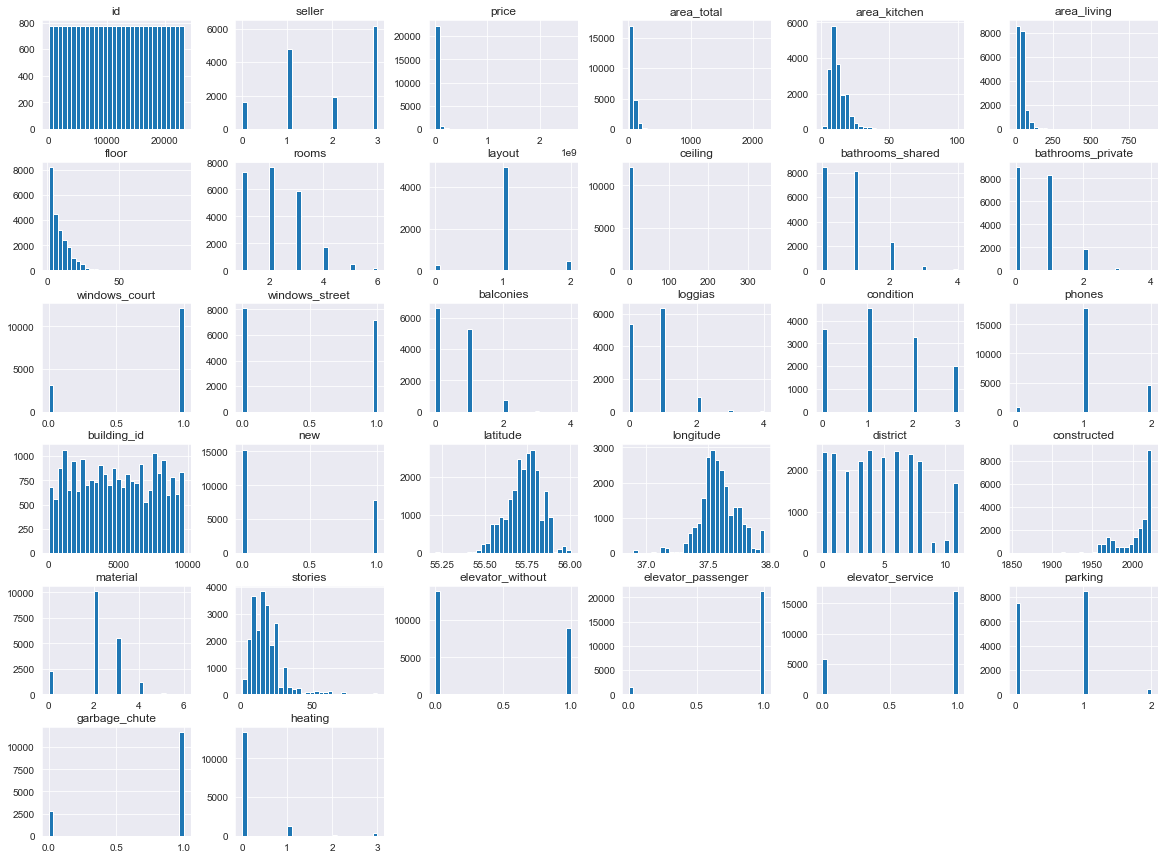

In [111]:
merged.hist(bins=30, figsize=(20,15))
plt.show()

What we are looking for here are data with odd distributions. We can see that some of these diagrams are heavily "one sided". What we mean by this is that some of the data has mostly one value, or is skewed in some way. We can remove this by taking the logarithm of the given variables. We start by doing this to the *price*, *area_total*, "area_living* and *area_kitchen*

In [112]:
data = preprocessor.logify(merged.copy(), "price")
data = preprocessor.logify(data.copy(), "area_total")
data = preprocessor.logify(data.copy(), "area_living")
data = preprocessor.logify(data.copy(), "area_kitchen")

### Initial removing and filling of features
We will remove features with an overwhelming amount of *NaN* values, as these will just cause noise in the model, and features consisting of strings (such as the street), which will be impossible to categorize.
Adding to these, we will also remove features such as the *id* and *building_id* as these are redundant. We will at the same time as having the *latitude* and *longitude* merge these into one singular feature called *distance_center*, which will be the distance from the city center in meters. All this is done by the `Preprocessor.general_removal()` funciton.

We will also do a general clean-up of the *NaN* values. We do this with the `Preprocessor.remove_NaNs()` function. It will fill in data for all *NaN* values with a combination of using the mean value, and by adding a seperate class to the categorical data.

In [113]:
general_removed = preprocessor.general_removal(data)
removed_nans = preprocessor.remove_NaNs(general_removed)
visualizer.list_missing(removed_nans)

seller: 0.0%
price: 0.0%
area_total: 0.0%
area_kitchen: 0.0%
area_living: 0.0%
floor: 0.0%
rooms: 0.0%
ceiling: 0.0%
bathrooms_shared: 0.0%
bathrooms_private: 0.0%
windows_court: 0.0%
windows_street: 0.0%
balconies: 0.0%
loggias: 0.0%
condition: 0.0%
phones: 0.0%
new: 0.0%
latitude: 0.0%
longitude: 0.0%
district: 0.0%
constructed: 0.0%
material: 0.0%
stories: 0.0%
elevator_without: 0.0%
elevator_passenger: 0.0%
elevator_service: 0.0%
parking: 0.0%
garbage_chute: 0.0%
heating: 0.0%
distance_center: 0.0%


This proves we have removed all the *NaN* values in the dataset.<br>
The head now looks like this

In [96]:
removed_nans.head()

,seller,price,area_total,area_kitchen,area_living,floor,rooms,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,new,latitude,longitude,district,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating,distance_center
0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,2.650,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,55.544046,37.478055,11.0,2021.0,3.0,9.0,0.0,1.0,1.0,1.0,1.0,0.0,24990.901441
1,3.0,10500000.0,88.0,14.2,48.0,18.0,3.0,2.121,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,55.861282,37.666647,2.0,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,1.0,0.0,12305.443476
2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,2.650,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,55.663299,37.515335,6.0,2021.0,3.0,15.0,0.0,1.0,1.0,1.0,1.0,0.0,12041.570686
3,3.0,10500000.0,88.0,14.0,48.0,18.0,3.0,2.121,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,55.861282,37.666647,2.0,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,1.0,0.0,12305.443476
4,3.0,13900000.0,78.0,17.0,35.0,7.0,2.0,2.900,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,55.590785,37.451438,11.0,2017.0,2.0,15.0,0.0,1.0,1.0,1.0,0.0,0.0,21020.176014


### Visualizing correlations

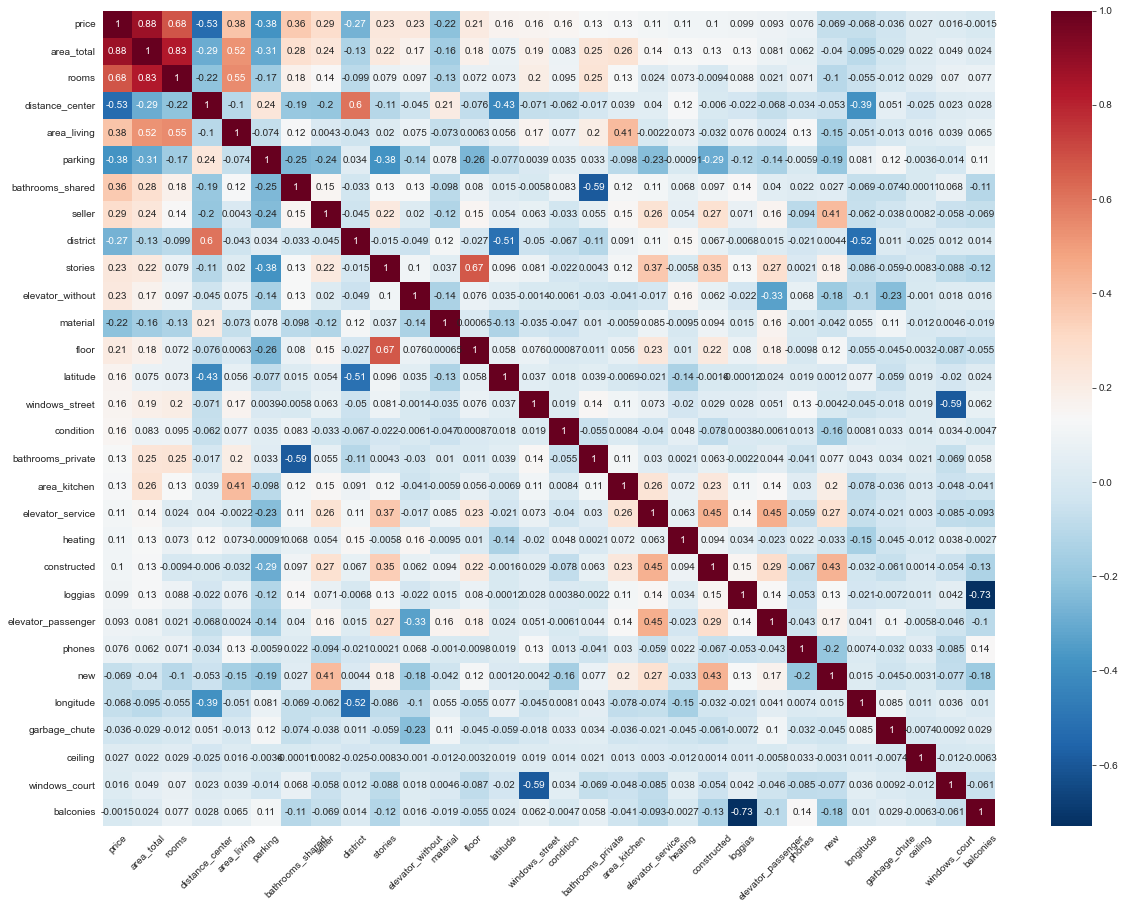

In [101]:
visualizer.price_correlation(removed_nans)

**Whoa!**<br>
That was quite a grid.
We can however remove some more features just by looking at this grid. There are some features with next to none correlation with the price, and we remove these using the function `Preprocessor.remove_redundant_features()`
We consider these features to be those with less than ***0.1*** correlation to the price, and those we deem dead.

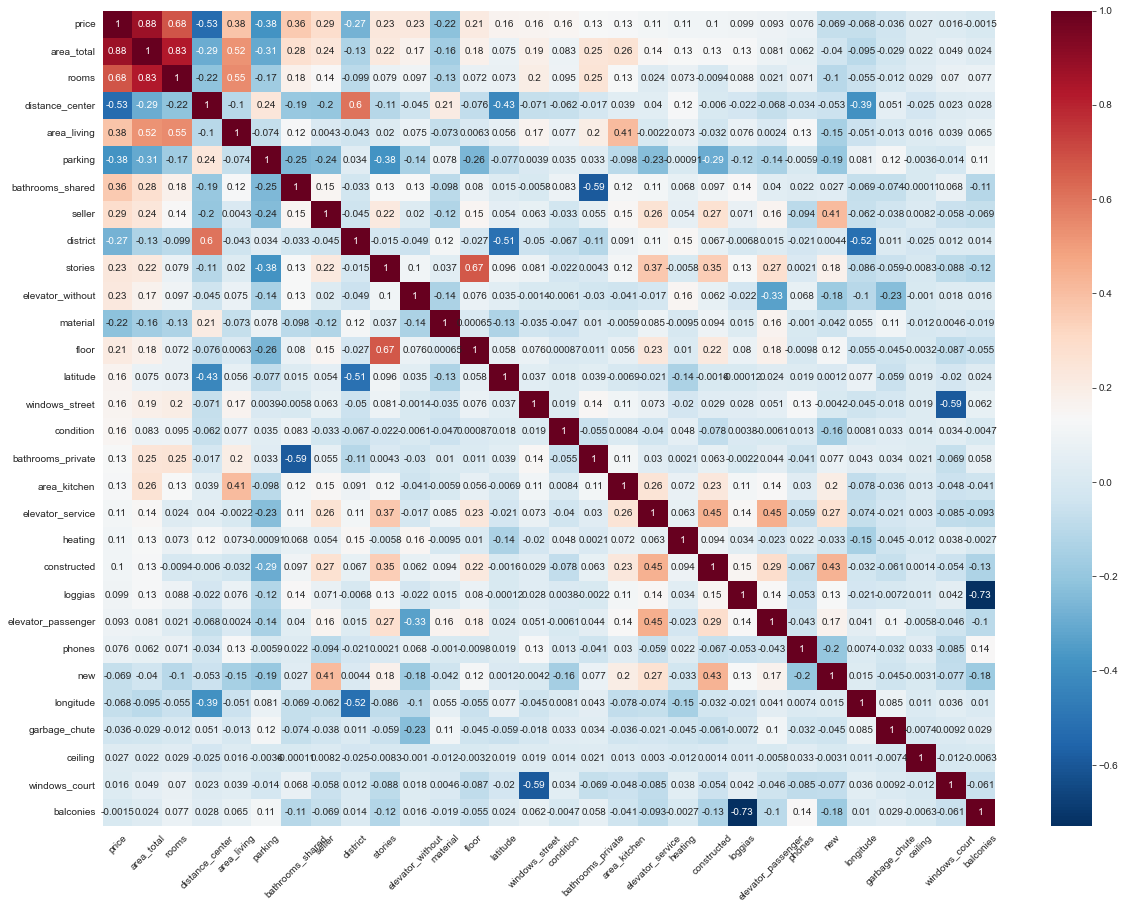

In [103]:
data = preprocessor.remove_redundant_features(removed_nans)
visualizer.price_correlation(data)

Here we can see the correlations between the data that have made it through the cleaning so far. There is nothing really surprising here. <br>
Some takeouts:
- Total area and price are very correlated
- Amount of rooms and price are highly correlated
- Living area and total area are highly correlated
- Distance to the city center and price are negatively correlated, and very much so
- Distance to city center and district are highly correlated
- Amount of stories in the building and apartment floor are highly correlated

## Data exploration

Lets start the exploration by plotting some of the distrubutions of the features with the highest correlation to price.<br>
Remember, some of the values in the dataset has been altered by taking the logarithm. This removed the skew we saw when we visualized the data before the cleaning process.<br>
We start with the price itself.

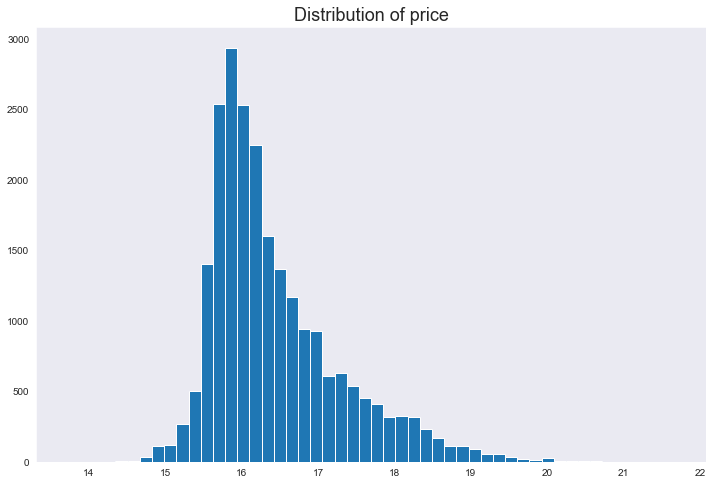

In [14]:
visualizer.plot_distribution(data, "price")

We can se that by taking the logarithm of the price, we get a much more spread out target for the algorithm. This will help it pinpointing more accurately where it want the price prediction to be. All we have to to is to convert it back to an actual price value.

Now we look at the total area. 

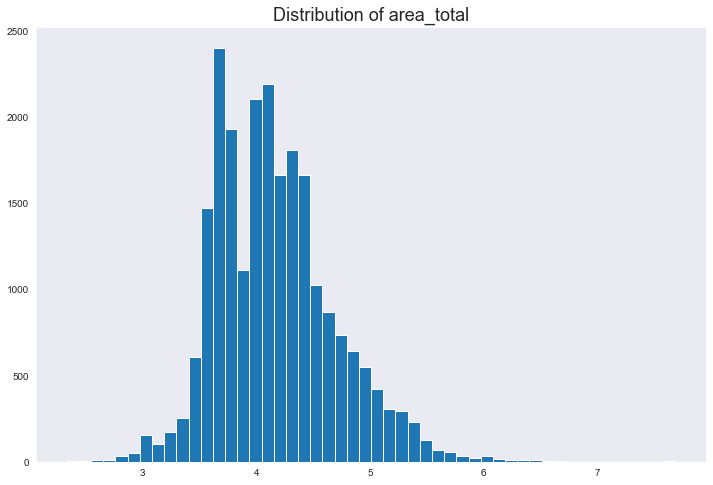

In [15]:
visualizer.plot_distribution(data, "area_total")

When taking the logarithm of the total area we get this distribution. This is the feature with the highest correlation to price - which of course is not surprising. It is, however, also highly correlated so some other features, namely living area and the amount of rooms. One way of dealing with this could be to create a new feature with these combined into one, or by splitting them even further. We will look into this in the feature engineering part of the notebook.

Now the distance to city center

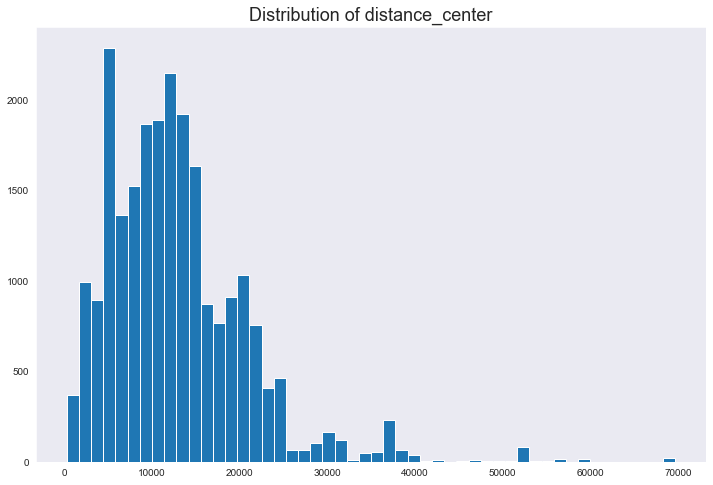

In [16]:
visualizer.plot_distribution(data, "distance_center")

This one is quite self explanatory. Most of the apartments are between 5 and 15 kilometers from the city center, with some being very far away. Lets plot the distance vs. the price to see if we can view the negative correlation we have in our grid.

## Scattering the correlations

The grid above gives us good insight in how the features are correlated to each other, but is of course not everything we need. In this section we will plot different features against each other to visualize the correlations between them. This may lead to us finding features we want to combine, but may also lead to us finding that we do not need a spesific feature. We will see.

Visualizing the correlations between different features will give us futher insight in how we will transform and change the data in later sections.

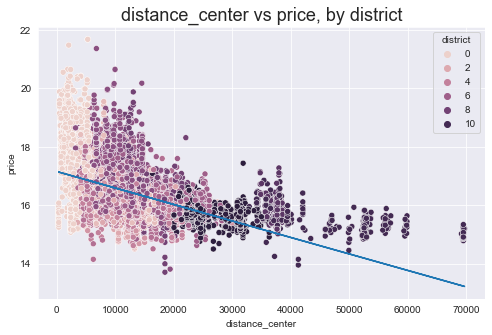

In [17]:
visualizer.plot_vs(data, "distance_center", "price", reg=True, figsize=(8,5), hue="district")

**Indeed!**<br> We see that we do have a negative trend where the more expensive apartments seem to be closer to the city center, and vice versa. This feature was not in the provided dataset, but was constructed by using the latitude and longitude of the building. This shows that by combining different features, we might find new ones which will make it easier for the algorithm to predict the correct price. We have used the district as a hue here, which does seem to separate into blocks in the plot. Something to have in mind.

Lets plot some more features vs. the price to view the correlation between them.

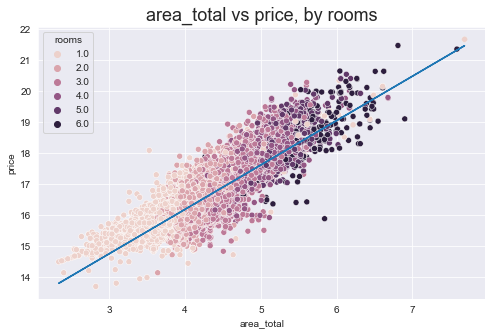

In [18]:
visualizer.plot_vs(data, "area_total", "price", reg=True, figsize=(8,5), hue="rooms")

Using rooms as the hue here shows that the more expensive apartments, which are often the largest, also have the most rooms. This shows a clear correlation between total area and the amount of rooms, which we already knew. However, the separation here are quite clear, making it even more obvious that these two depend on each other.

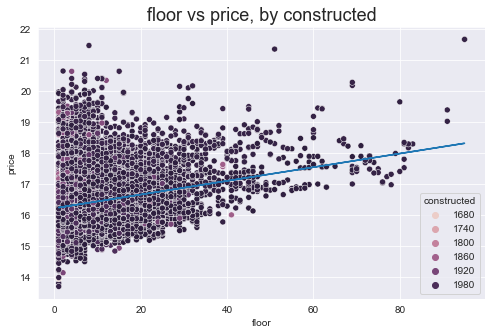

In [19]:
visualizer.plot_vs(data, "floor", "price", reg=True, figsize=(8,5), hue="constructed")

This shows something interesting. For one it shows that often, the higher the floor, the higher the price. But it also shows that the vast majority of the apartments are build in the 2010s, and they are everywhere on the plot. Meaning that the year of construction might not have as much to say when it comes to price than one might think. Lets plot this.

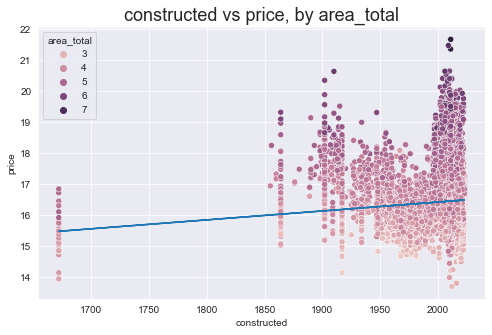

In [20]:
visualizer.plot_vs(data, "constructed", "price", reg=True, figsize=(8,5), hue="area_total")

Look at that. The price based on contruction year is very scattered around. It look like almost all the buildings build before 1925 are above the trend, meaning that old buildings go for just as much, if not more, than new ones. We have set the hue to show the total area in this case, showing that even though some of the old buildings are large, they are not that much bigger than apartments in the same price range built 75 years later. This is fascinating.

As we have removed features that did not meet our threshold of **0.1**, most of the features have a clear correlation to price when we plot them. We did not plot all features here, but just a select few, just to show that some of these features are very scattered. This means that even though some correlation does exist, it will be quite hard to know where to place the price for a new apartment based on the training data. 

Before starting the feature engineering, lets plot some of the features against each other, and not only the price. This will give us some insight in how the features are correlated to each other, and not only the price. Maybe we can find a way to create new and better features out of this exploration, like we did with latitude and longitude earlier? Lets see.

#### Exploring features correlated to eachother

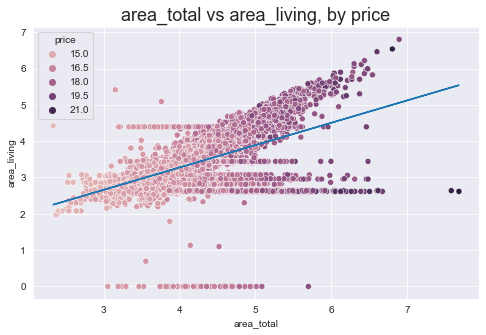

In [21]:
visualizer.plot_vs(data, "area_total", "area_living", reg=True, figsize=(8,5), hue="price")

As we though, total area, living area and rooms are very correlated. The price of the apartment also follows this trend it seems. We will look at this correlation when we start feature engineering as these might be eligible for altering and/or combining.

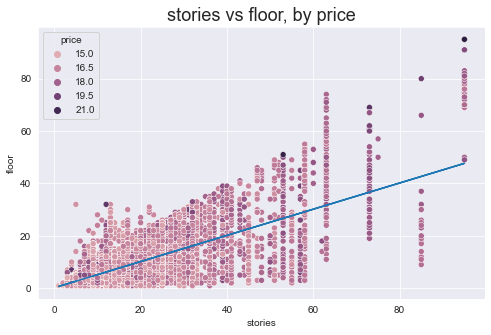

In [22]:
visualizer.plot_vs(data, "stories", "floor", reg=True, figsize=(8,5), hue="price")

This plot shows a clear correlation with stories and floor. Of course, it is not very surprising that apartments on higher floors are in buildings with more stories. The hue here is based on the price, showing some lean towards higher story buldings, and apartments on the higher floors of them. Maybe something to think about 

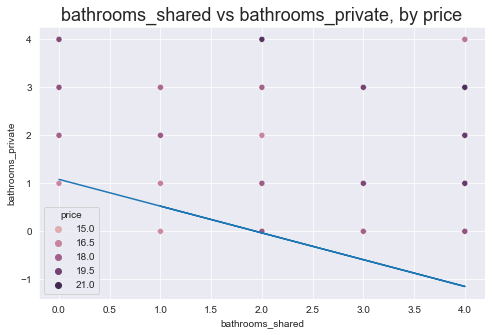

In [23]:
visualizer.plot_vs(data, "bathrooms_shared", "bathrooms_private", reg=True, figsize=(8,5), hue="price")

Nothing very surprising here. When the amount of private bathrooms goes down, the amount of shared bathrooms go up, and vice versa.

### TODO - More plotting of features

## Feature engineering

This section is where we will change the data in a more drastic way than we have. We have already cleaned the data, removing NaNs and non-important features, but that does not mean that we will not find a way to combine this non-important features into new ones with actual impact. We will try to create features where they correlate to the price in a more impactful manner than they did alone, making it easier for the machine learning algorithm to predict accurately.

We will reference to earlier sections when discussing and explaining our though processes as the insight obtained in the data exploration phase will be used all through this section. 

Earlier in this notebook we did some minor feature engineering when we removed the skew for some features, and created the *distance_center* feature by combining the latitude and longitude. We will continue this work. 

In the exploration we found correlations between the total area and the amount of rooms in an apartment. Let's see what a combination of these would look like. <br>
We will createa new features for this: **avg_room_size**

- **avg_room_size**: the average size of a room in the apartment.

Both of these are done by the function `Preprocessor.combine_area_rooms()`

               avg_room_size     price
avg_room_size       1.000000 -0.450685
price              -0.450685  1.000000


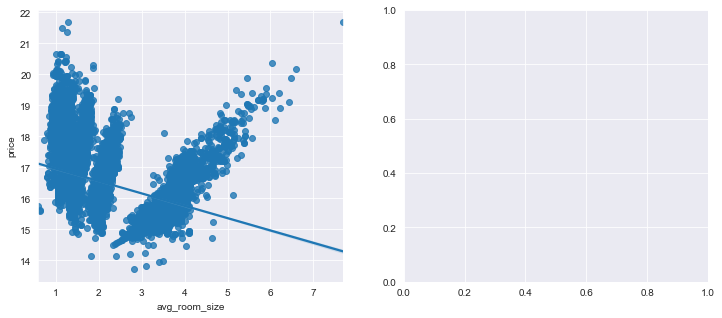

In [24]:
featured = preprocessor.combine_area_rooms(data.copy())
visualizer.corr_target(featured, cols=["avg_room_size"], target='price')

We see that the average room size does correlate to the price pretty well, but negatively. This means that the larger the rooms are on average, the lower the price of the apartment is. This is different from the *living_part* where it is very correlated to the price, but positively. This means that if the living area is larger than the average room size, the price of the apartment will most likely be higher.

We will also combine the bathroom features to one *bathroom_amount*, giving a more clearcut way of describing the bathroom situation

                   bathrooms_private  bathrooms_shared  bathroom_amount  \
bathrooms_private           1.000000         -0.590677         0.401306   
bathrooms_shared           -0.590677          1.000000         0.502040   
bathroom_amount             0.401306          0.502040         1.000000   
price                       0.134314          0.358798         0.551239   

                      price  
bathrooms_private  0.134314  
bathrooms_shared   0.358798  
bathroom_amount    0.551239  
price              1.000000  


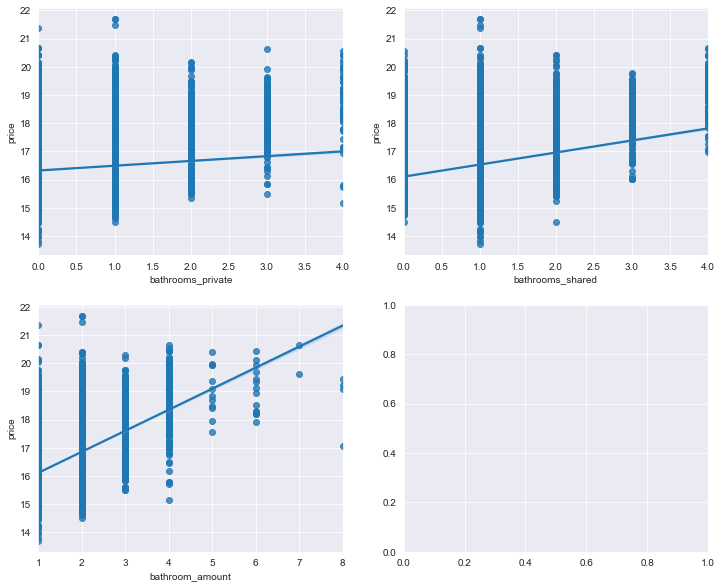

In [25]:
featured = preprocessor.combine_baths(featured)
visualizer.corr_target(featured, cols=["bathrooms_private", "bathrooms_shared", "bathroom_amount"], 
                target='price')
featured = preprocessor.remove_labels(featured.copy(), labels=["bathrooms_private", "bathrooms_shared"])

This shows that combining the two gives a higher correlation to the price than each of them on their own. We will therefore remove the other two, and replace them with this new feature.

## THIS IS WORK IN PROGRESS

In [26]:
#feaured = preprocessor.combine_windows(featured)
#visualizer.corr_target(featured, cols=["windows_street", "windows_court", "has_windows"], target='price')

In [27]:
#featured = preprocessor.find_rich_neighboors(featured)
#visualizer.corr_target(featured, cols=["latitude", "longitude", "rich_neighboors"], target='price')

                   floor   stories  relative_floor     price
floor           1.000000  0.673907        0.860316  0.212198
stories         0.673907  1.000000        0.756166  0.233266
relative_floor  0.860316  0.756166        1.000000  0.238574
price           0.212198  0.233266        0.238574  1.000000


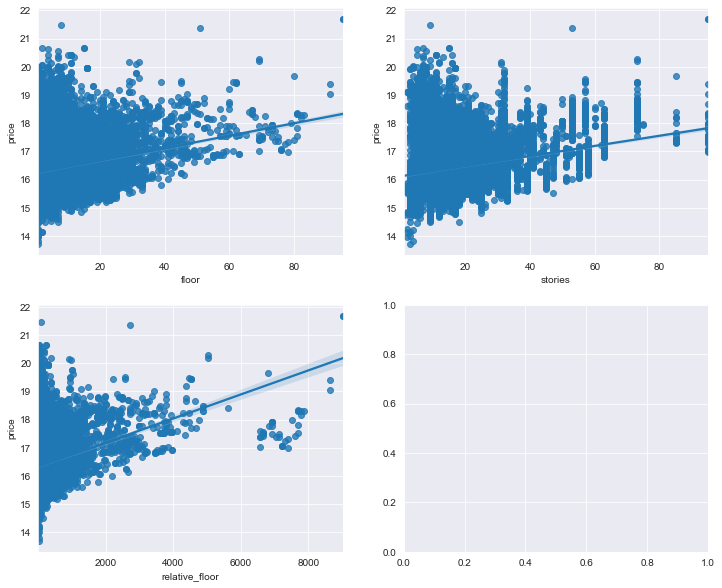

In [28]:
featured = preprocessor.relative_floor(featured)
visualizer.corr_target(featured, cols=["floor", "stories", "relative_floor"], target='price')
featured = preprocessor.remove_labels(featured.copy(), ["floor", "stories"])

(<AxesSubplot:title={'center':'Moscow apartment price by location'}, xlabel='longitude', ylabel='latitude'>,
 <matplotlib.colors.Normalize at 0x1d64088a130>)

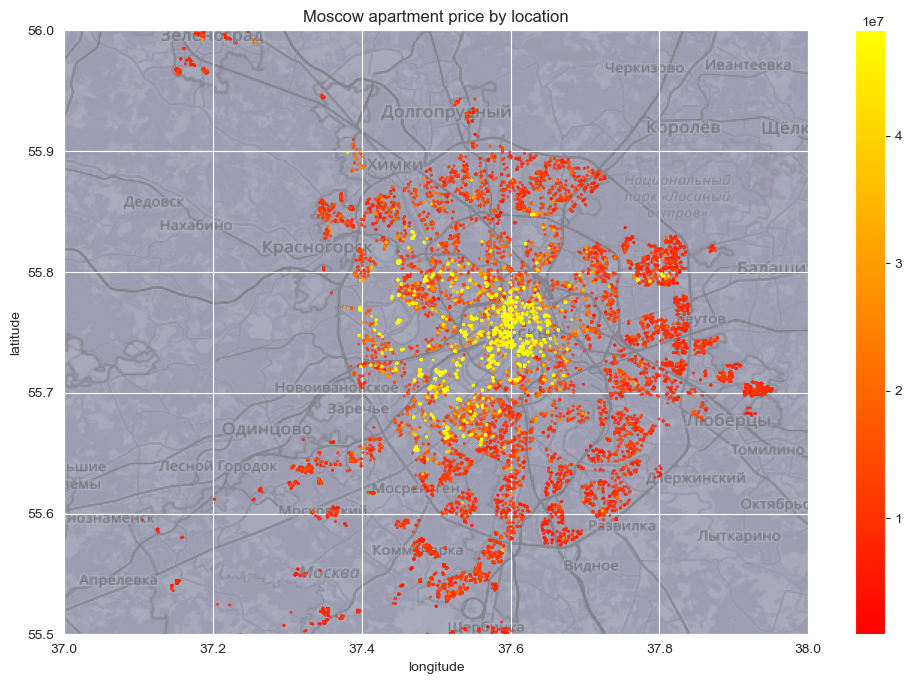

In [29]:
visualizer.plot_map(featured)

## WORK IN PROGRESS ENDED

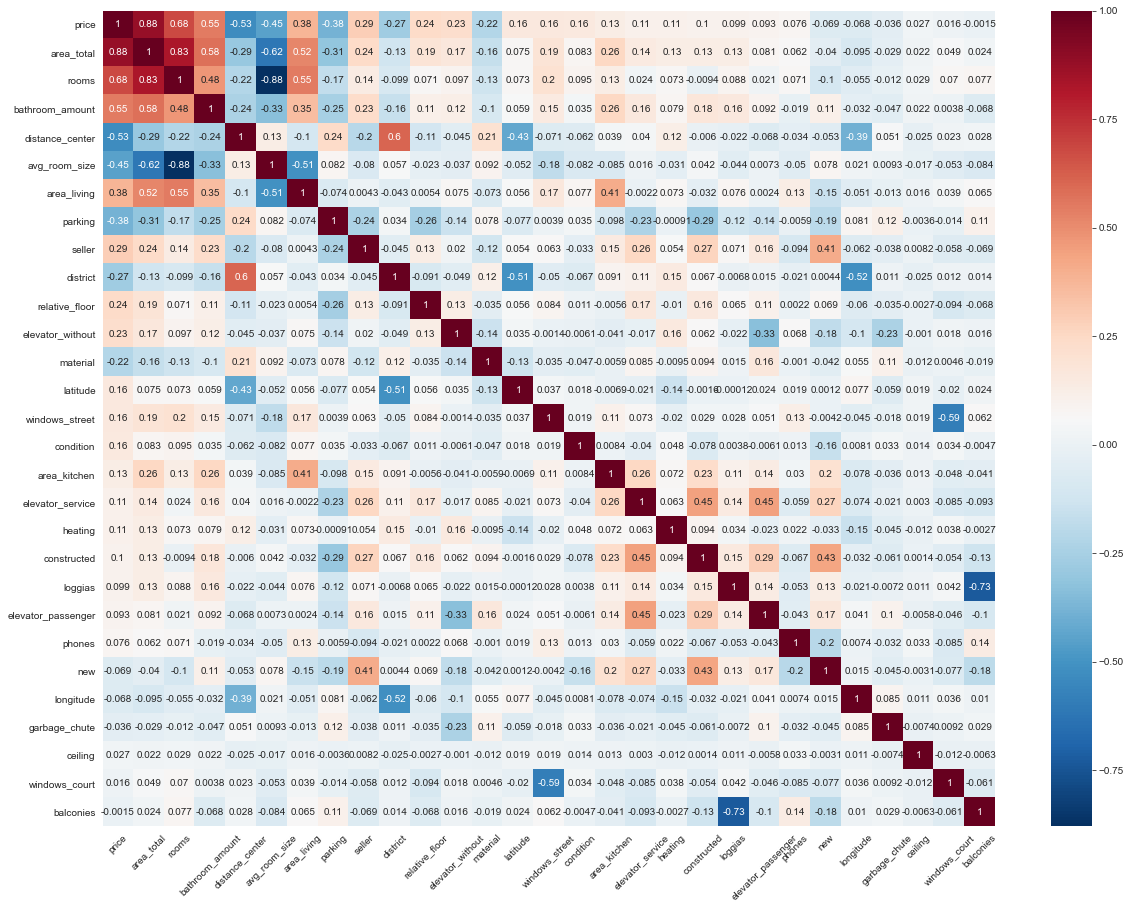

In [30]:
visualizer.price_correlation(featured)

## TESTING MODEL FOR 28. Oct

The randomf model in TestModel

In [10]:
p = Preprocessor()
final = preprocessor.split_categorical_features()
train_data = p.preprocess(final.iloc[:len(p.merged), :])
test_data = p.preprocess(final.iloc[len(p.merged):, :])
labels = train_data["price"]
train_data.drop("price", 1, inplace=True)
test_data.drop("price", 1, inplace=True)

model = TestModel(train_data, labels)
pipeline = model.fit()
test_pred = [np.expm1(pred) for pred in model.predict(model.x_test)]
test_labels = [np.expm1(lab) for lab in model.y_test]

res = np.round(pd.DataFrame([(test_labels[i], test_pred[i]) for i in range(
        len(test_pred))], columns=["actual", "prediction"]))
print("RMLSE: %s" % model.root_mean_squared_log_error(test_labels, test_pred))
res.to_csv("./split.csv", index=False)

pred = [np.expm1(p) for p in model.predict(test_data)]
model.save_predictions(np.round(pred))

C:\Users\campa\Documents\projects\TDT4173_group69\src\Preprocessor.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ceiling"][i] = district_average[key]["ceiling"]
C:\Users\campa\Documents\projects\TDT4173_group69\src\Preprocessor.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["area_kitchen"][i] = district_average[key]["area_kitchen"]
C:\Users\campa\Documents\projects\TDT4173_group69\src\Preprocessor.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

[00:09:09] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[00:09:09] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMLSE: 0.14897545867792505


,id,price_prediction
0,23285,29055408.0
1,23286,10381843.0
2,23287,6486038.0
3,23288,9904006.0
4,23289,5310578.0
...,...,...
9932,33217,24755236.0
9933,33218,28077264.0
9934,33219,9418006.0
9935,33220,10938360.0
